In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv("Advertising.csv")
df

Sl.No.     TV  radio  newspaper  sales
0         1  230.1   37.8       69.2   22.1
1         2   44.5   39.3       45.1   10.4
2         3   17.2   45.9       69.3    9.3
3         4  151.5   41.3       58.5   18.5
4         5  180.8   10.8       58.4   12.9
..      ...    ...    ...        ...    ...
195     196   38.2    3.7       13.8    7.6
196     197   94.2    4.9        8.1    9.7
197     198  177.0    9.3        6.4   12.8
198     199  283.6   42.0       66.2   25.5
199     200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [3]:
df.isnull()

Sl.No.     TV  radio  newspaper  sales
0     False  False  False      False  False
1     False  False  False      False  False
2     False  False  False      False  False
3     False  False  False      False  False
4     False  False  False      False  False
..      ...    ...    ...        ...    ...
195   False  False  False      False  False
196   False  False  False      False  False
197   False  False  False      False  False
198   False  False  False      False  False
199   False  False  False      False  False

[200 rows x 5 columns]

In [4]:
df.isnull().sum()

Sl.No.       0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

The dataset does not have any NaN values

In [5]:
df.dtypes

Sl.No.         int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

Dataset has all float values.

In [6]:
(df.loc[0:]==" ").sum()

Sl.No.       0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Dataset does not have any null values 

In [7]:
(df.loc[0:]==0).sum()

Sl.No.       0
TV           0
radio        1
newspaper    0
sales        0
dtype: int64

Dataset has one features (radio) with value=0. Which is possible, when the radio channel had no contribution to sales.

# EDA

<AxesSubplot:xlabel='TV'>

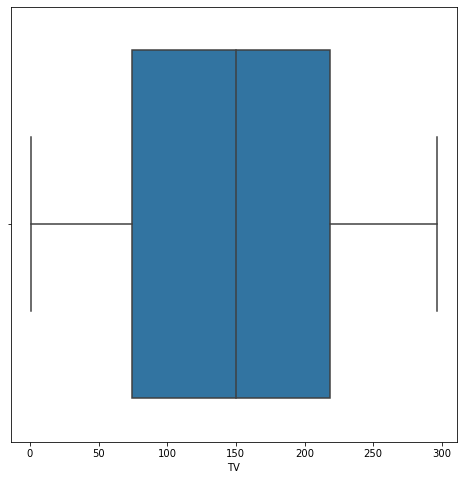

In [8]:
plt.subplots(figsize=(8,8))
sns.boxplot(data=df,x="TV")

50th percentile (median) for the TV channel = 150 

<AxesSubplot:xlabel='sales', ylabel='TV'>

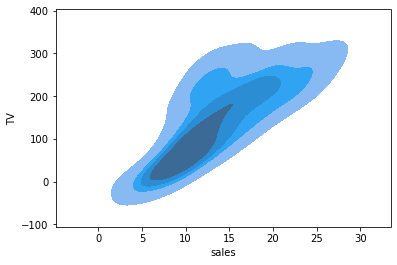

In [9]:
sns.kdeplot(data=df,x="sales",y="TV",levels=5,fill=True)

Higher density is noticed with Tv channels between 0-200 units and sales between 5-20 units

<AxesSubplot:xlabel='radio'>

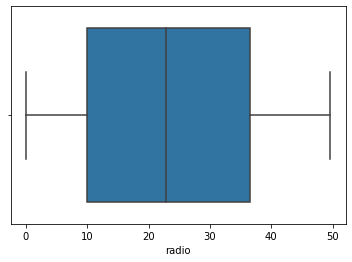

In [10]:
sns.boxplot(data=df,x="radio")

No evident outliers, 50th percentile is between 20-25

<AxesSubplot:xlabel='newspaper'>

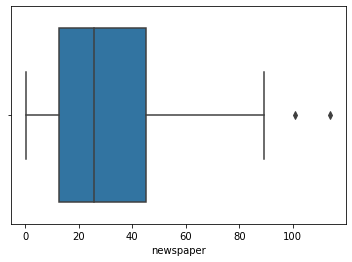

In [11]:
sns.boxplot(data=df,x="newspaper")

Newspaper channel seems to have a few outliers. 

<AxesSubplot:xlabel='TV', ylabel='sales'>

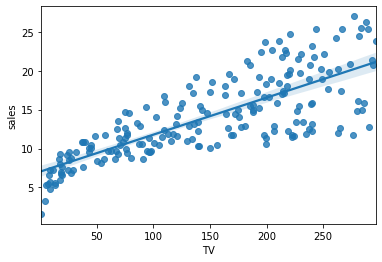

In [12]:
sns.regplot(data=df,x="TV",y="sales")

TV and sales have a linear approach. When the units of the TV channels have increased the sales has also followed.

The curve does have a y-intercept. 

<AxesSubplot:xlabel='radio', ylabel='sales'>

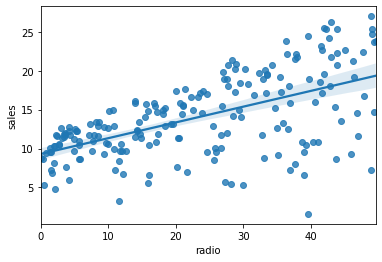

In [13]:
sns.regplot(data=df,x="radio",y="sales")

Radio and sales have a linear relationship. When the radio channel had units =0 the sales were close to 10 as the units on the channel increased there is an increase in the overall sales.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

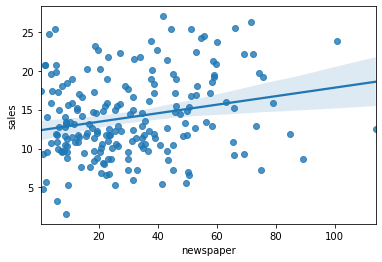

In [14]:
sns.regplot(data=df,x="newspaper",y="sales")

newspaper and sales also have a linear relationship. 

Worth noticing is the curve between newspaper and sales have a flatter curve when compaired with the curve between radio and sales. 

Likewise,the curve between radio and sales is flatter than the curve between TV and sales. 

Which indicates TV channels to be an effective means to increase sales when compared to radio or newspaper.

In [15]:
df=df.drop(["Sl.No."],axis=1)

In [16]:
df.corr()

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

<AxesSubplot:>

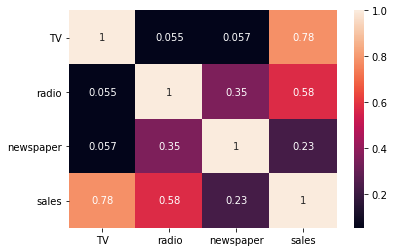

In [17]:
sns.heatmap(df.corr(),annot=True)

1. All features are positively correlated with sales. 


2. No multi-colinearity. 


3. TV has the highest correlation with sales (0.78). 


4. Newspaper has the least correlation (0.23).

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


No null values and features are float

In [19]:
df.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

# Checking for outliers and skewness

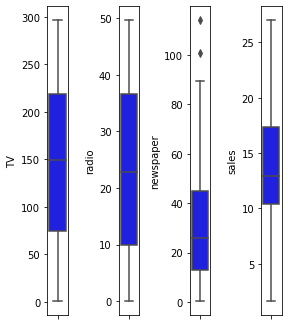

In [20]:
collist=df.columns.values
ncol=15 #no.of columns and rows to display the graphs i.e max col and max row
nrows=10
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df[collist[i]],color="blue",orient="v")
    plt.tight_layout()

Observations:
    
Newspaper has outliers. 

In [21]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Observation:
    
newspaper has skewness over 0.5.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

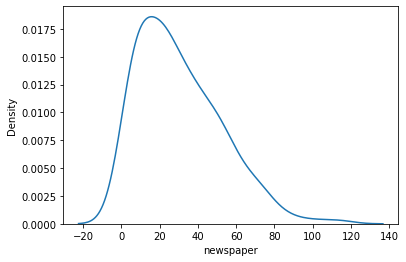

In [22]:
sns.kdeplot(data=df,x="newspaper")

<AxesSubplot:xlabel='TV', ylabel='Density'>

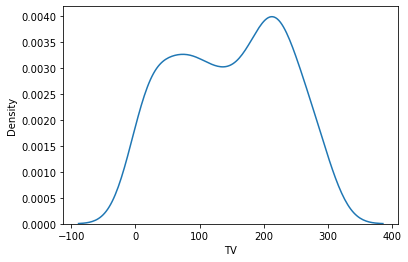

In [23]:
sns.kdeplot(data=df,x="TV")

<AxesSubplot:xlabel='radio', ylabel='Density'>

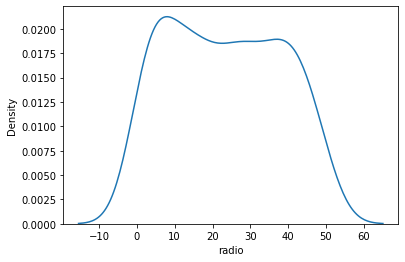

In [24]:
sns.kdeplot(data=df,x="radio")

<AxesSubplot:xlabel='sales', ylabel='Density'>

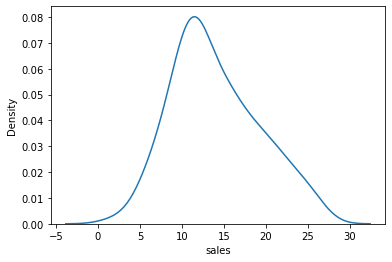

In [25]:
sns.kdeplot(data=df,x="sales")

Features do not show a normally distributed curve. 

# Data Cleaning 

In [26]:
import scipy 
from scipy.stats import zscore

In [27]:
z=np.abs(zscore(df)) 
z.shape

(200, 4)

In [28]:
threshold=3  #removing outliers 
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(200, 4)
(198, 4)


In [29]:
#dataloss
loss=(200-198)/200*100
loss

1.0

Since the dataloss is less than 10% we can proceed.

In [30]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [31]:
#removing skewness

from sklearn.preprocessing import power_transform 
x=power_transform(x,method="yeo-johnson")

In [32]:
x_df=pd.DataFrame(data=x)
x_df.skew()

0   -0.320682
1   -0.236668
2   -0.101288
dtype: float64

All features have skewness between -0.5 - 0.5

# Preprocessing

In [33]:
import sklearn
from sklearn.preprocessing import StandardScaler 

In [34]:
ss=StandardScaler()
x=ss.fit_transform(x)

# Linear Regression 

In [35]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split 

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [37]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2_train=r2_score(pred_train,y_train)
    r2_test=r2_score(pred_test,y_test)
    print("Accuracy_train=",r2_train,"At random_state =",i)
    print("Accuracy_test=",r2_test,"At random_state =",i)
    print("\n")

Accuracy_train= 0.8904804356502445 At random_state = 0
Accuracy_test= 0.8995517052176802 At random_state = 0


Accuracy_train= 0.8981453316965802 At random_state = 1
Accuracy_test= 0.8945848152555803 At random_state = 1


Accuracy_train= 0.9065645892224968 At random_state = 2
Accuracy_test= 0.8449269806363064 At random_state = 2


Accuracy_train= 0.8936441876631787 At random_state = 3
Accuracy_test= 0.9040425441959381 At random_state = 3


Accuracy_train= 0.8986974112685383 At random_state = 4
Accuracy_test= 0.8769945124740702 At random_state = 4


Accuracy_train= 0.894344773014199 At random_state = 5
Accuracy_test= 0.8817747196879593 At random_state = 5


Accuracy_train= 0.8976645054572484 At random_state = 6
Accuracy_test= 0.8437881484495258 At random_state = 6


Accuracy_train= 0.8930836046305419 At random_state = 7
Accuracy_test= 0.8980924110849856 At random_state = 7


Accuracy_train= 0.8993605579515119 At random_state = 8
Accuracy_test= 0.8255028722519442 At random_state = 8


Ac

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=9,test_size=0.2)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
r2_train=r2_score(pred_train,y_train)
r2_test=r2_score(pred_test,y_test)
print("Accuracy_train=",r2_train)
print("Accuracy_test=",r2_test)

Accuracy_train= 0.8917945360163543
Accuracy_test= 0.9147812318725834


# Regularization

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
import warnings 
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso

parameters={"alpha":[0.0001,.001,0.1,1,10],"random_state":list(range(0,100)),"max_iter":list(range(100,200)),"selection":["cyclic","random"]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

In [40]:
ls=Lasso(alpha=0.1,random_state=90,max_iter=100,selection="random",fit_intercept=True)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
lss=r2_score(y_test,pred_ls)
lss_train=r2_score(y_train,pred_train)
print("Test Accuracy = ",lss)
print("Train Accuracy = ",lss_train)

Test Accuracy =  0.9161428330070626
Train Accuracy =  0.901543863700018


In [41]:
for i in range(2,11):
    lss_cv=cross_val_score(ls,x,y,cv=i)
    lssc=lss_cv.mean()
    print("Score =",lssc*100,"at cv =",i)

Score = 90.14615075512133 at cv = 2
Score = 89.7234834599248 at cv = 3
Score = 89.80784403656428 at cv = 4
Score = 89.5780138287583 at cv = 5
Score = 89.8167014580228 at cv = 6
Score = 89.46420818070641 at cv = 7
Score = 89.8153283579087 at cv = 8
Score = 89.37135261966867 at cv = 9
Score = 89.55776414957968 at cv = 10


# Ensembling 

In [49]:
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
y_ad=ad.predict(x_test)
r2_score(y_test,y_ad)

0.9714555964840997

# DecisionTreeRegressor

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
decisionTreeRegressor = DecisionTreeRegressor()
decisionTreeRegressor.fit(x_train,y_train)
y_pred = decisionTreeRegressor.predict(x_test)
r2_score(y_test,y_pred)

0.967103408306834

# SVR

In [50]:
from sklearn.svm import SVR

In [51]:
svr = SVR()
svr.fit(x_train,y_train)
y_svr = svr.predict(x_test)
r2_score(y_test,y_svr)

0.9563575729164967

# Cross val score

Cross val for AdaBoost

In [57]:
from sklearn.model_selection import cross_val_score 
for i in range(2,11):
    rf_cv=cross_val_score(ad,x,y,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)

Score = 95.23927621895058 at cv = 2
Score = 95.75992224800824 at cv = 3
Score = 95.2235820775071 at cv = 4
Score = 95.42954587998685 at cv = 5
Score = 95.69575394734794 at cv = 6
Score = 95.54388145484847 at cv = 7
Score = 95.2868141648898 at cv = 8
Score = 95.46788249909726 at cv = 9
Score = 95.82814679884362 at cv = 10


Cross val for DecisionTreeRegressor 

In [53]:
for i in range(2,11):
    rf_cv=cross_val_score(decisionTreeRegressor,x,y,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)

Score = 90.71987766191911 at cv = 2
Score = 94.84894796498376 at cv = 3
Score = 94.15614508682889 at cv = 4
Score = 95.04203794456657 at cv = 5
Score = 93.95992504482358 at cv = 6
Score = 94.83015703968134 at cv = 7
Score = 94.25581415881786 at cv = 8
Score = 93.97186877515952 at cv = 9
Score = 94.97557390779565 at cv = 10


Cross val for SVR

In [55]:
for i in range(2,11):
    rf_cv=cross_val_score(svr,x,y,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)

Score = 86.60284441799949 at cv = 2
Score = 89.95351608744402 at cv = 3
Score = 91.35257569293861 at cv = 4
Score = 92.02978192122427 at cv = 5
Score = 92.11852040016363 at cv = 6
Score = 92.14852078488843 at cv = 7
Score = 92.2282860669734 at cv = 8
Score = 92.21330826526528 at cv = 9
Score = 92.89180178558316 at cv = 10


In [58]:
rf_cv=cross_val_score(ad,x,y,cv=10)
rfs=rf_cv.mean()
print("CV_Score =",rfs*100)
print("Accuracy_score =",r2_score(y_test,y_ad)*100)

CV_Score = 95.71682736903631
Accuracy_score = 97.14555964840997


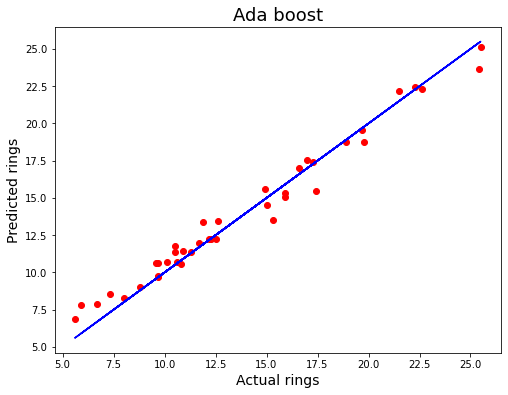

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_ad,color="r")
plt.plot(y_test,y_test,color="b")
plt.xlabel("Actual rings",fontsize=14)
plt.ylabel("Predicted rings",fontsize=14)
plt.title("Ada boost",fontsize=18)
plt.show()

# Model Saving 

In [60]:
import pickle 
filename= "Ad.pkl"
pickle.dump(ad, open(filename,"wb"))

# Conclusion 

In [61]:
a=np.array(y_test)
predicted = np.array(ad.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index=range(len(a)))
df_com

original  predicted
0       12.3  12.266667
1       16.6  17.000000
2       15.3  13.535897
3        9.7   9.736364
4       14.9  15.572340
5       10.8  10.550000
6       11.7  11.954545
7        7.3   8.555556
8       12.6  13.425000
9       10.1  10.727778
10       6.7   7.875000
11      19.8  18.781250
12       5.9   7.785714
13      15.9  15.331250
14      19.7  19.535714
15       9.6  10.620588
16      11.9  13.405882
17      10.9  11.409091
18       8.8   9.050000
19      10.5  11.778947
20      25.4  23.621212
21      11.3  11.396552
22      25.5  25.106667
23      18.9  18.781250
24      17.0  17.555769
25      12.5  12.266667
26      12.2  12.266667
27      17.3  17.416667
28      17.4  15.458824
29       8.0   8.300000
30      15.9  15.092308
31      22.3  22.443478
32      21.5  22.196667
33       9.7  10.620588
34      22.6  22.280357
35      15.0  14.541538
36       9.7   9.712500
37      10.6  10.696552
38       5.6   6.900000
39      10.5  11.396552